# Task 4.10: Instacart Management Questions


## Step 1- Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#set path
path = r'C:\Users\RUZANNA\OneDrive\Desktop\Careerfoundry\Python\Instacart Basket Anlysis-05.2023'

In [3]:
data = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'data_instacart.pkl'))

In [4]:
department_name = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'department_name.pkl'))

In [5]:
data.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', 'busiest_day', 'price_range_loc', 'Busiest days',
       'Slowest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_order', 'Frequency_flag',
       'Gender', 'state', 'age', 'date_of_joined', 'number_of_dependents',
       'family_status', 'income', 'region', 'exclusive_flag', 'age_flag',
       'income_flag', 'family_dependents_flag', 'parents_flag',
       'organic_product', 'organic_counts', 'life_style'],
      dtype='object')

## Question No 1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

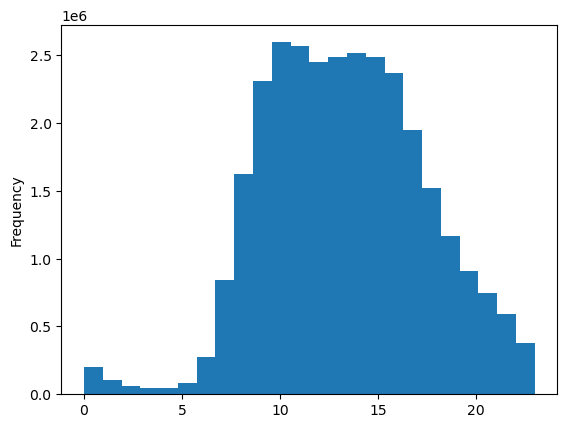

In [6]:
hist_data = data['order_hour_of_day'].plot.hist (bins =24) 

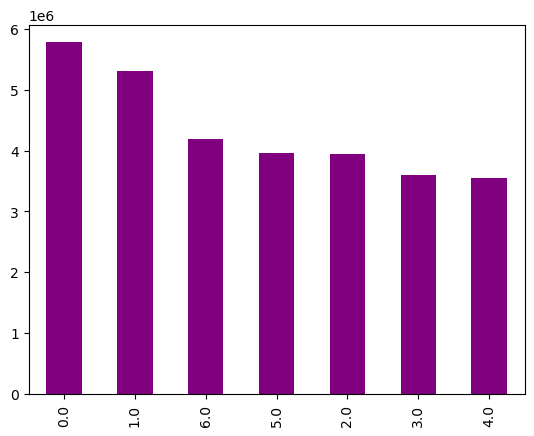

In [7]:
bar = data['orders_day_of_week'].value_counts().plot.bar(color = ['purple'])

## Question No 2. Instacart team  wants to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

<Axes: title={'center': 'Busiest Period of Day'}>

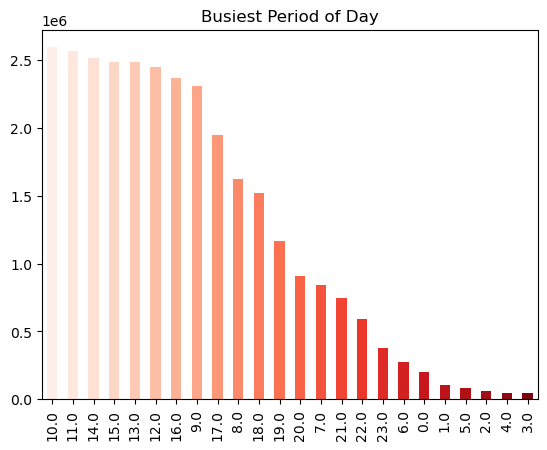

In [8]:
# illustrate the busiest period of a day
data['order_hour_of_day'].value_counts(dropna=False).plot(kind='bar',  title = 'Busiest Period of Day', color = sns.color_palette('Reds', 24))


## Create price_hist histogram to see how prices are distributed.

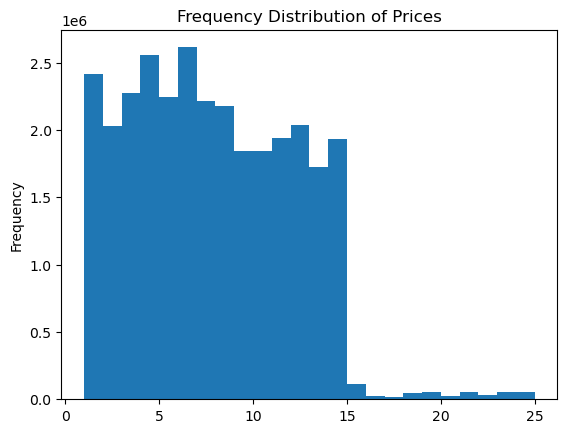

In [9]:
hist_prices = data['prices'].plot.hist (bins =24, title = 'Frequency Distribution of Prices') 

## Sort products by name and by prices

In [10]:
data['prices'].sort_values( ascending = False).head(5)

18630111    25.0
16440887    25.0
14857747    25.0
14857746    25.0
25318472    25.0
Name: prices, dtype: float64

In [28]:
# group product by name and by prices to demonstrate the name of products and their prices.
data.groupby('product_name').agg({'prices':[ 'mean']}).sort_values(by='product_name', ascending = False).reset_index().head(5)

,product_name,prices
,,mean
0,with a Splash of Pineapple Coconut Water,4.2
1,with a Splash of Mango Coconut Water,2.6
2,with Xylitol Watermelon Twist 18 Sticks Sugar ...,3.5
3,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,5.2
4,with Xylitol Unwrapped Original Flavor 50 Stic...,5.4


## Question No 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts. 

In [9]:
data['price_range_loc'].value_counts(normalize=True)

Mid range product     0.674678
Low range product     0.312468
High range product    0.012854
Name: price_range_loc, dtype: float64

<Axes: title={'center': 'Price grouping'}>

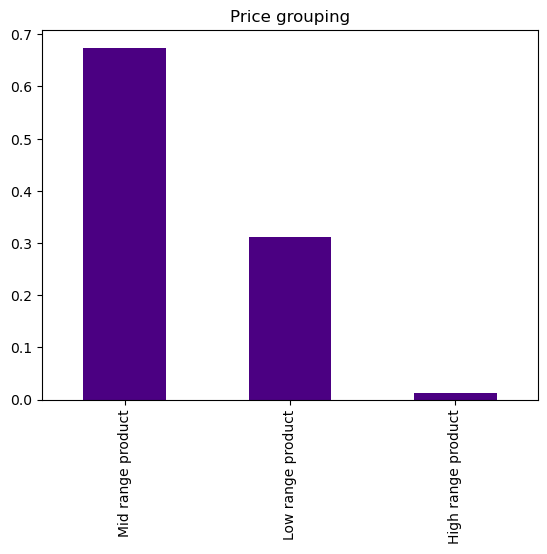

In [10]:
data['price_range_loc'].value_counts(normalize= True).plot(kind= 'bar' , title = 'Price grouping', color = 'Indigo' )

In [54]:
# grouping by spending habits
data['spending_flag'].value_counts(normalize=True)

Low spender     0.980274
High Spender    0.019726
Name: spending_flag, dtype: float64

<Axes: title={'center': 'Spenders Distribution'}>

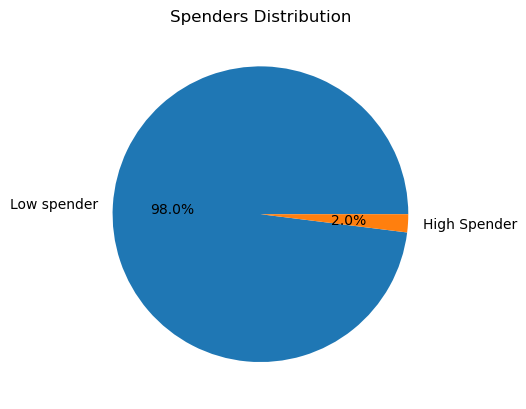

In [58]:
# illustrate the distribution of spenders with ie chart
data['spending_flag'].value_counts(normalize=True).plot(kind = 'pie',label = '', title = 'Spenders Distribution', autopct ='%.1f%%' )

## Question No 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

<Axes: title={'center': 'The most popular departments'}>

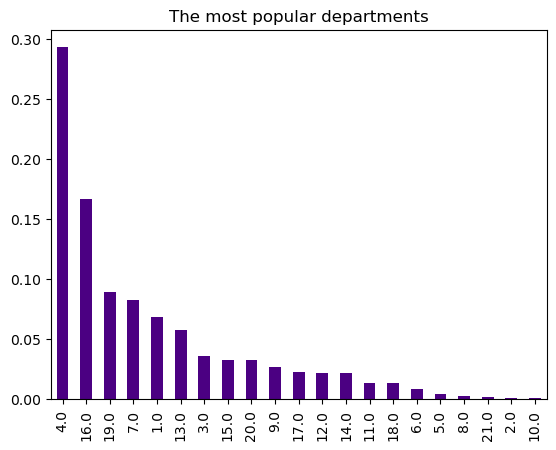

In [52]:
# illustration of order frequency by departments
data['department_id'].value_counts(normalize= True).plot(kind='bar',  title = 'The most popular departments', color = 'Indigo')

In [50]:
data.groupby('department_id').agg({'prices':[ 'mean']})

,prices
,mean
department_id,
1.0,7.735903
2.0,6.978149
3.0,7.856413
4.0,7.982129
5.0,8.149425
6.0,7.680640
7.0,7.684291
8.0,7.886079


<Axes: title={'center': 'Distribution of Average prices by Departments'}, xlabel='department_id'>

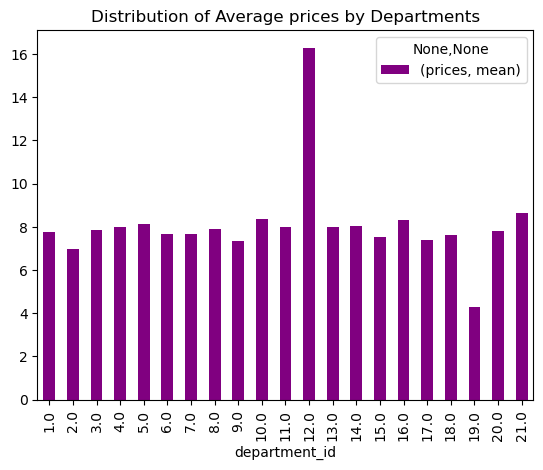

In [48]:
data.groupby('department_id').agg({'prices':[ 'mean']}).sort_values(by='department_id', ascending = True).plot(kind = 'bar', title ='Distribution of Average prices by Departments', color = 'purple')

In [51]:
department_name

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


## The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. 

## Question No 5 What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart.?

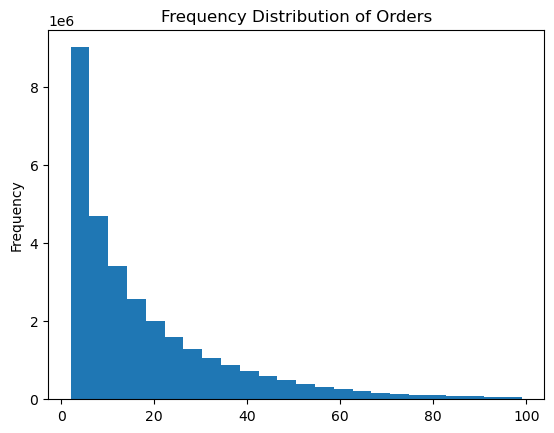

In [53]:
# Create the histogram of orders to see how the frequency of orders distributed.
hist_orders = data['order_number'].plot.hist (bins =24, title = 'Frequency Distribution of Orders') 

In [12]:
data['loyalty_flag'].value_counts()

Regular customer    15081691
Loyal customer      10095381
New customer         5151691
Name: loyalty_flag, dtype: int64

In [13]:
data['loyalty_flag'].value_counts()

Regular customer    15081691
Loyal customer      10095381
New customer         5151691
Name: loyalty_flag, dtype: int64

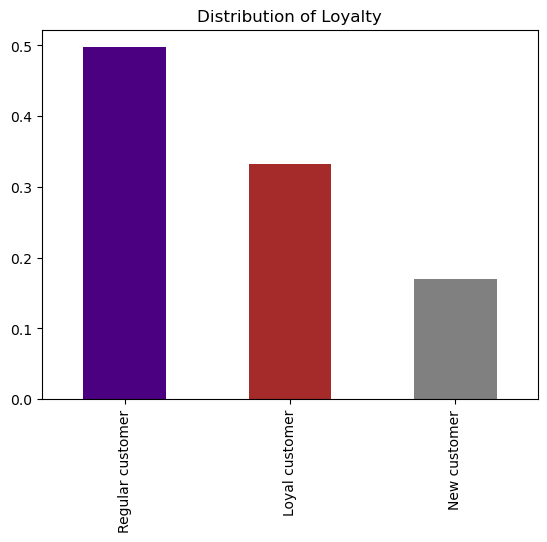

In [14]:
bar_loyalty = data['loyalty_flag'].value_counts(normalize= True).plot( kind = 'bar', title = 'Distribution of Loyalty', color = ['indigo', 'brown', 'gray'])

## Question No 6. Are there differences in ordering habits based on a customer’s loyalty status?

<Axes: title={'center': 'Frequency of return of Loyal customers'}, xlabel='loyalty_flag'>

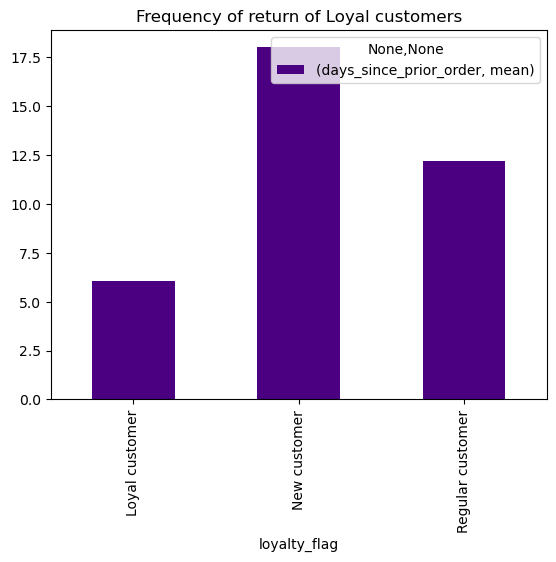

In [15]:
# loyalty statistics- how frequently loyal customers return
data.groupby('loyalty_flag').agg({'days_since_prior_order':[ 'mean']}).plot(kind= 'bar', title = 'Frequency of return of Loyal customers', color = ['indigo'])

<Axes: title={'center': 'Order habits of Loyal customers'}, xlabel='loyalty_flag'>

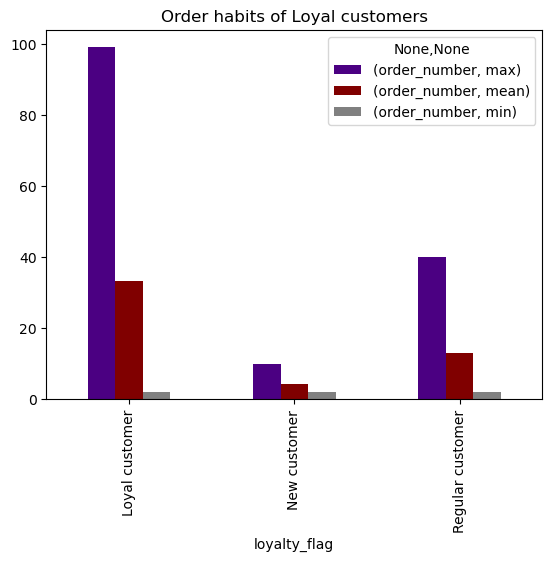

In [16]:
#loyalty statistics- how frequently loyal customers order
data.groupby('loyalty_flag').agg({'order_number':['max', 'mean', 'min']}).plot(kind= 'bar', title ='Order habits of Loyal customers', color = ['indigo', 'maroon','gray'])


## Qestion 7 Are there differences in ordering habits based on a customer’s region?

In [17]:
data['spending_flag'].value_counts(dropna=False)

Low spender     29730505
High Spender      598258
Name: spending_flag, dtype: int64

In [18]:
#create crosstab with data for plotting
crosstab_spending_region = pd.crosstab(data['region'], data['spending_flag'], dropna = False)

In [19]:
crosstab_spending_region

spending_flag,High Spender,Low spender
region,,
Midwest,148321,6959265
Norteast,102905,5253367
South,197110,9902707
West,149922,7615166


## With illustration it will be easier to see the differences between the rigions.

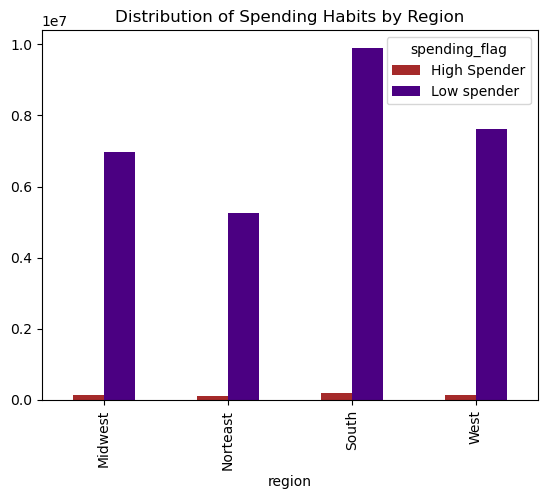

In [20]:
#ilustrate bar chart
bar_crosstab_spending= crosstab_spending_region.plot.bar(color = ['brown', 'indigo'], title= 'Distribution of Spending Habits by Region')

### From the above chart we can see that the highest number of spenders (high and low) are from South region, which follows by West, Midwest and Northeast regions.

In [21]:
#exporting bar chart to the visualization folder
bar_crosstab_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',  'bar_region_spending.png' ))

## Average Price Statistics by Region

In [22]:
# create region statistics
data.groupby('region').agg({'days_since_prior_order':['max', 'mean', 'min'], 'order_number':['max', 'mean', 'min'],'prices':['max', 'mean', 'min']})


days_since_prior_order                 order_number                  \
                            max       mean  min          max       mean  min   
region                                                                         
Midwest                    30.0  11.181836  0.0         99.0  18.022433  2.0   
Norteast                   30.0  11.075769  0.0         99.0  18.325174  2.0   
South                      30.0  11.108108  0.0         99.0  18.257678  2.0   
West                       30.0  11.047195  0.0         99.0  18.385890  2.0   

         prices                 
            max      mean  min  
region                          
Midwest    25.0  7.792488  1.0  
Norteast   25.0  7.782516  1.0  
South      25.0  7.795964  1.0  
West       25.0  7.790790  1.0

<Axes: title={'center': ' Average Price Statistics by Region'}, xlabel='region'>

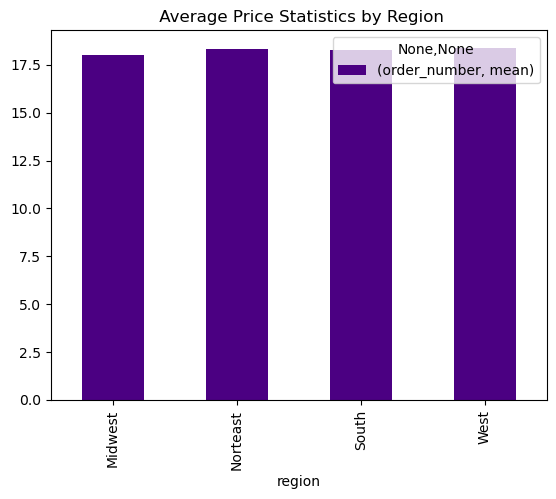

In [23]:
# Order habits across the region, (Illustrate regional statistics for excel report,)
data.groupby('region').agg({'order_number':['mean']}).plot(kind='bar',  title = ' Average Price Statistics by Region', color = 'Indigo')


<Axes: title={'center': ' Orders Statistics by Region'}, xlabel='region'>

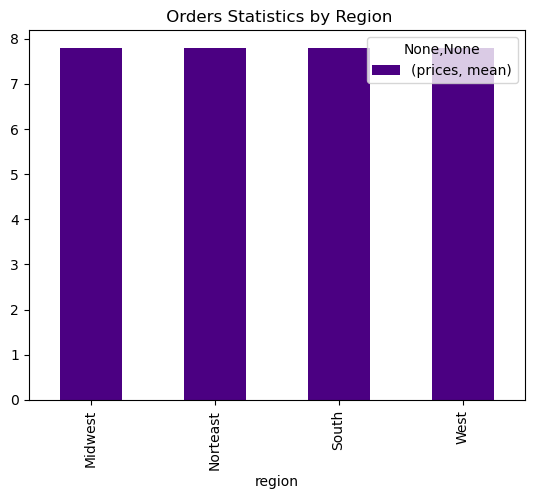

In [24]:
# Average Price differences across the region, (Illustrate regional statistics for excel report)
data.groupby('region').agg({'prices':['mean']}).plot(kind='bar',  title = ' Orders Statistics by Region', color = 'Indigo')

## 8 Is there a connection between age and family status in terms of ordering habits?

In [25]:
# Order habits by family status
data.groupby('family_status').agg({'order_number':['mean']})

,order_number
,mean
family_status,
divorced/widowed,18.389356
living with parents and siblings,18.402577
married,18.190712
single,18.369866


<Axes: title={'center': ' Family Status and Ordering Habits'}, xlabel='family_status'>

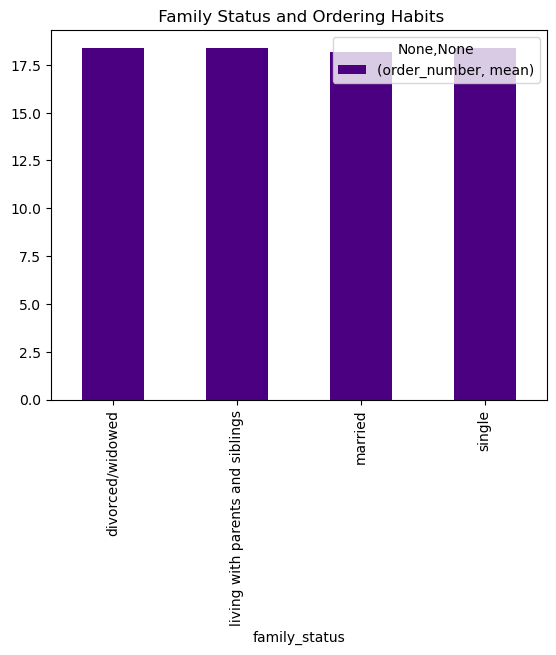

In [26]:
# Illustration of order habits by family status
data.groupby('family_status').agg({'order_number':['mean']}).plot(kind='bar',  title = ' Family Status and Ordering Habits', color = 'Indigo')


In [27]:
# Creat crosstab between 'family_status' and 'age_flag' to see how they interact with each other. 
crosstab_family_age = pd.crosstab(data['family_status'], data['age_flag'], normalize = True)

<Axes: title={'center': 'Age-Family Status'}, xlabel='family_status'>

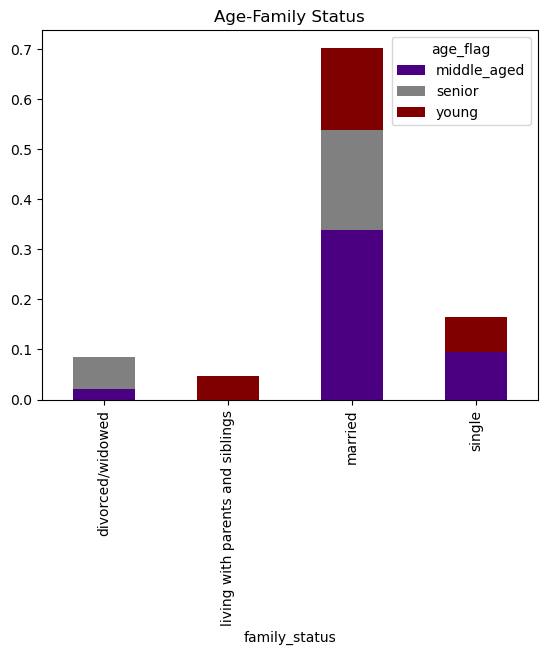

In [28]:
# Illustrate crosstab to see how data distributed by family and by age.
crosstab_family_age.plot(kind= 'bar', stacked= True, color = ['indigo', 'gray', 'maroon',  'olive'], title='Age-Family Status')

In [29]:
# to find connection between age and family status in terms of ordering habbits.
data.groupby(['age_flag', 'family_status']).agg({'order_number':['mean']})

order_number
                                                     mean
age_flag    family_status                                
middle_aged divorced/widowed                    18.925029
            married                             18.198007
            single                              18.519547
senior      divorced/widowed                    18.224438
            married                             18.194415
young       living with parents and siblings    18.402577
            married                             18.171158
            single                              18.169201

<Axes: title={'center': 'Age, Family, Ordering Habits'}, xlabel='age_flag,family_status'>

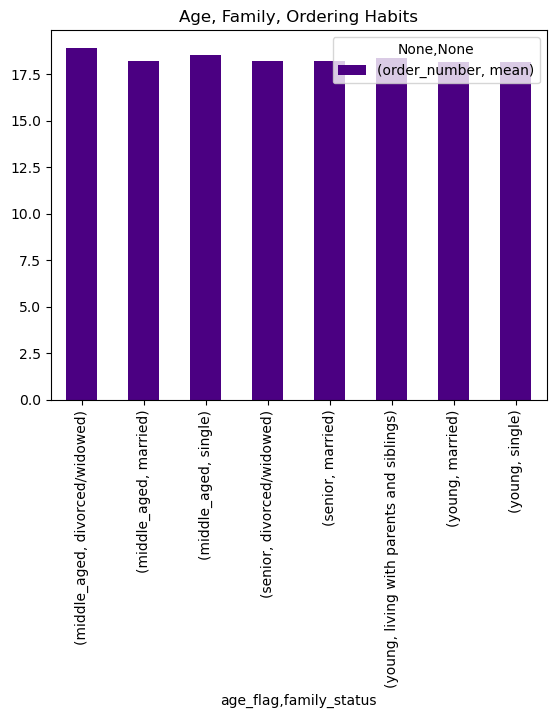

In [30]:
data.groupby(['age_flag', 'family_status']).agg({'order_number':['mean']}).plot(kind='bar',  title = 'Age, Family, Ordering Habits',  color = 'Indigo')

## "Question 9 What different classifications does the demographic information suggest?
## Age? Income? Certain types of goods? Family status?"							
 

In [31]:
# You can see the charts that are used for the answering this question in the task 4.10 "Coding Etiqutte and Excell reporting".

##  What differences can you find in ordering habits of different customer profiles? 
## Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.														


In [32]:
# to find differencies in ordering habits and price of orders for customers classified by age.
data.groupby('age_flag').agg({'order_number':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

order_number                 prices               
                     max       mean  min    max      mean  min
age_flag                                                      
middle_aged         99.0  18.297112  2.0   25.0  7.791527  1.0
senior              99.0  18.201836  2.0   25.0  7.797161  1.0
young               99.0  18.209926  2.0   25.0  7.785970  1.0

<Axes: title={'center': 'Ordering Habits classified by age'}, xlabel='age_flag'>

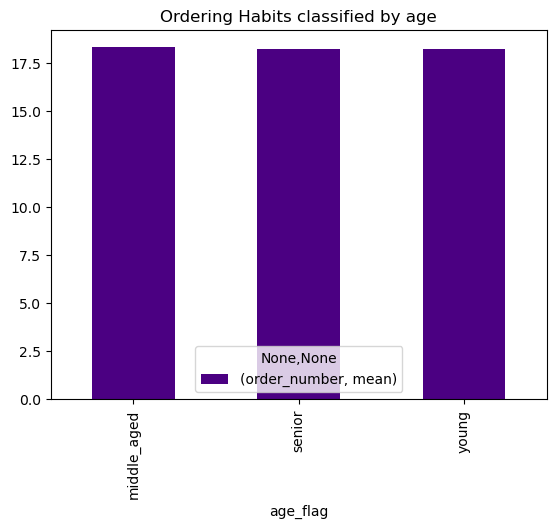

In [33]:
# Illustrate ordering habits for customers classified by age.
data.groupby('age_flag').agg({'order_number':['mean']}).plot(kind = 'bar', title= 'Ordering Habits classified by age', color = ['Indigo'])

<Axes: title={'center': 'Average prices paid by customers classified by age'}, xlabel='age_flag'>

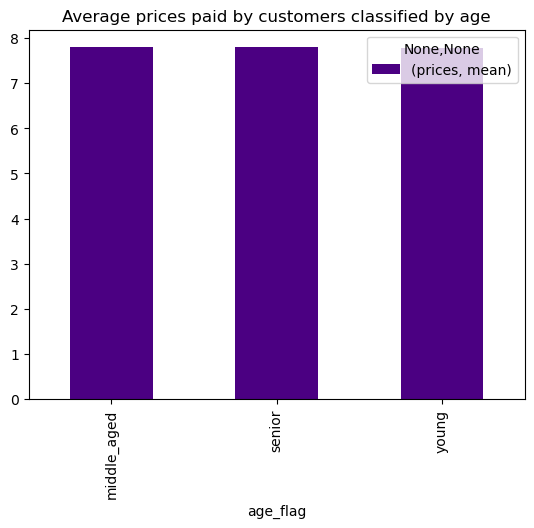

In [34]:
# Illustrate prices paid by customers classified by age.
data.groupby('age_flag').agg({'prices':['mean']}).plot(kind = 'bar', title= 'Average prices paid by customers classified by age', color = ['Indigo'])

In [6]:
# to find differencies in ordering habits and price of orders for customers classified by family status.
data.groupby('income_flag').agg({'order_number':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

order_number                 prices               
                      max       mean  min    max      mean  min
income_flag                                                    
Low_income           99.0  16.307746  2.0   25.0  6.523854  1.0
high_income          99.0  20.541614  2.0   25.0  7.790595  1.0
lower_middle         99.0  17.907369  2.0   25.0  7.372562  1.0
upper_middle         99.0  18.363270  2.0   25.0  7.961246  1.0

<Axes: title={'center': 'Ordering habits for customers classified by Income'}, xlabel='income_flag'>

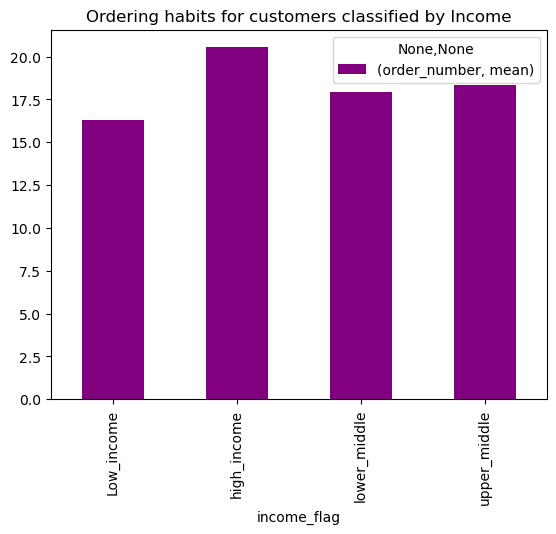

In [7]:
# Illustrate ordering habits for customers classified by income.
data.groupby('income_flag').agg({'order_number':['mean']}).plot(kind = 'bar', title= 'Ordering habits for customers classified by Income', color = ['purple'])

<Axes: title={'center': 'Prices paid by customers classified by Income'}, xlabel='income_flag'>

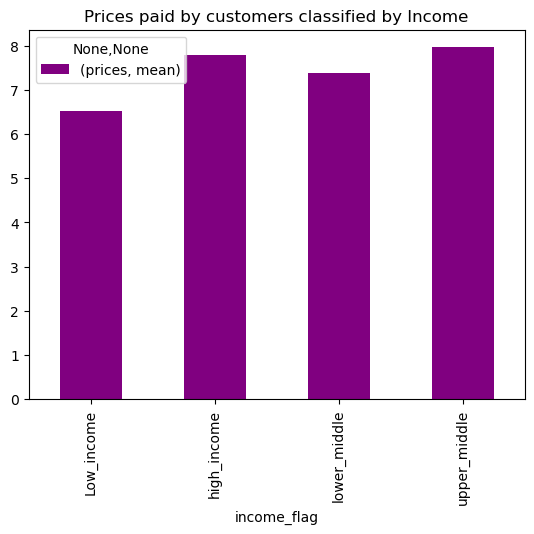

In [9]:
# Illustrate prices paid bycustomers classified by income.
data.groupby('income_flag').agg({'prices':['mean']}).plot(kind = 'bar', title= 'Prices paid by customers classified by Income', color = ['purple'])

In [10]:
# to find differencies in ordering habits and price of orders for customers classified by number of dependants.
data.groupby('number_of_dependents').agg({'order_number':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

order_number                 prices               
                              max       mean  min    max      mean  min
number_of_dependents                                                   
0                            99.0  18.376537  2.0   25.0  7.791225  1.0
1                            99.0  18.203438  2.0   25.0  7.795453  1.0
2                            99.0  18.164297  2.0   25.0  7.785011  1.0
3                            99.0  18.244737  2.0   25.0  7.794100  1.0

<Axes: title={'center': 'Prices paid by customers classified by Income'}, xlabel='number_of_dependents'>

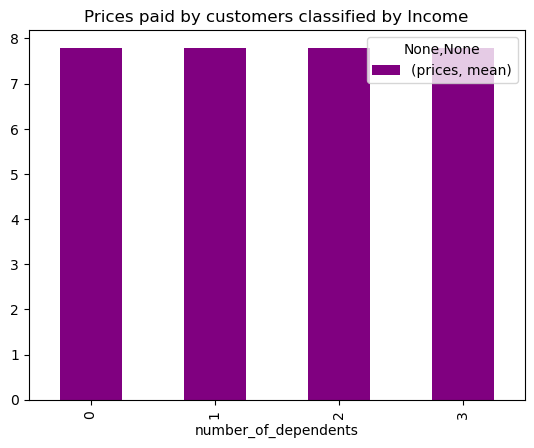

In [11]:
# Illustrate prices paid bycustomers classified by income.
data.groupby('number_of_dependents').agg({'prices':['mean']}).plot(kind = 'bar', title= 'Prices paid by customers classified by Income', color = ['purple'])

In [14]:
# to find differencies in prices paid by customers classified by family_status.
data.groupby('family_status').agg({'order_number':['mean'], 'prices':['mean']})

,order_number,prices
,mean,mean
family_status,,
divorced/widowed,18.389356,7.802780
living with parents and siblings,18.402577,7.801693
married,18.190712,7.790831
single,18.369866,7.785211


<Axes: title={'center': 'Order habits and Prices paid by customers classified by Family_Status'}, xlabel='family_status'>

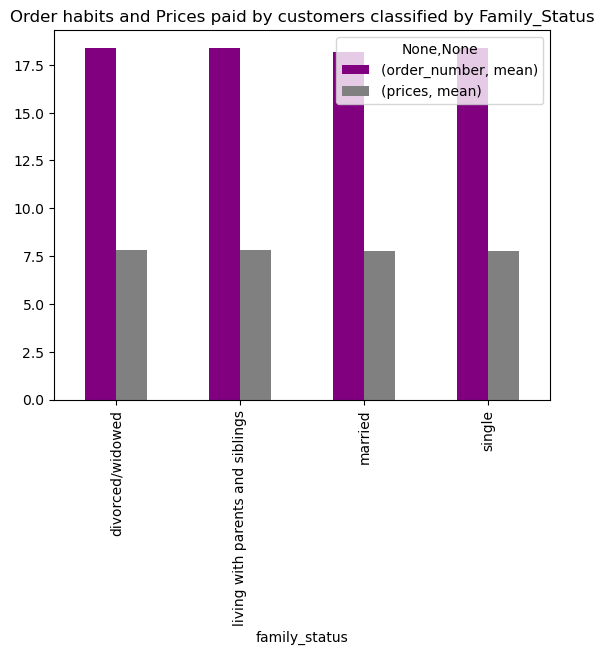

In [15]:
# to illustrate order habits and prices paid by Family_Status group
data.groupby('family_status').agg({'order_number':['mean'], 'prices':['mean']}).plot(kind = 'bar', title= 'Order habits and Prices paid by customers classified by Family_Status', color = [ 'Purple','Gray'])

In [12]:
# to find differencies in ordering habits and price of orders for customers classified by number of dependants.
data.groupby('life_style').agg({'order_number':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

order_number                 prices               
                     max       mean  min    max      mean  min
life_style                                                    
non_organic         99.0  21.798348  2.0   25.0  7.423598  1.0
organic             99.0  21.805413  2.0   25.0  7.429442  1.0

<Axes: title={'center': 'Prices paid by customers classified by Life_Style'}, xlabel='life_style'>

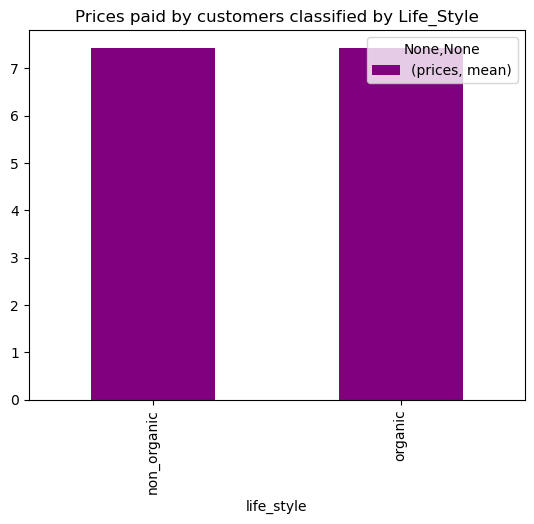

In [13]:
# Illustrate prices paid by customers classified by life style.
data.groupby('life_style').agg({'prices':['mean']}).plot(kind = 'bar', title= 'Prices paid by customers classified by Life_Style', color = ['purple'])